In [76]:
from shogun import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn import svm
from shogun import *
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
dataframe = pd.read_csv('../data/vid-game.csv')
df = dataframe.dropna()

df.shape

(6825, 16)

In [78]:
# training set
col_x = [col for col in df.columns
      if col != 'Genre']
X_train = df[col_x]

# X_train.head()

In [79]:
# target variable
target = ['Genre']
y_train = df[target]

In [80]:
X_train = X_train.drop(columns=['Name'],axis=0) #Name variable doesn't hold much info
# X_train.columns


In [81]:
#Now we have only the categorical variable
encoder = LabelEncoder()
s = (X_train.dtypes == 'object')
cat_vars= list(s[s].index)

# X_train[cat_vars].notna()

In [82]:
#  Labeling properly the columns with object data type
le = LabelEncoder()

label_X = X_train.copy()
for col in cat_vars:
    label_X[col] = le.fit_transform(label_X[col])
y_train = le.fit_transform(y_train)  #Convert to float    

#Convert features and labels suitable for shogun
label_X= label_X.to_numpy().astype(float)
y_train = y_train.astype(float)
y_train = y_train.reshape(y_train.shape[0],) #reshape to (num_samples,)


In [83]:
time_skl = []
time_sgn = []
time_diff = []
accuracy_list=[]
size = [1000,2000,3000,4000,5000,6000,7000,8000,9000]

In [88]:
for m in size:
    print(m)


#SKLEARN
    label_X_temp = label_X[:m]
    y_train_temp = y_train[:m]
    skr = svm.SVC()

    t0 = time()
    skr.fit(label_X, y_train)
    tsk1 = time() - t0

    y_predict = skr.predict(label_X_temp)
    print("Accuracy: " + str(accuracy_score(y_train_temp,y_predict)))
    accuracy_list.append(accuracy_score(y_train_temp,y_predict))
    
    


#SHOGUN
    train_features = RealFeatures(label_X_temp.T)
    labels_train = MulticlassLabels(y_train_temp)

    
    C = 1.0
    epsilon = 0.001
    gauss_kernel = GaussianKernel(train_features, train_features, 15)

    sg_svm = MulticlassLibSVM(C, gauss_kernel, labels_train)
    sg_svm.set_epsilon(epsilon)

    t0 = time()
    sg_svm.train()
    tsg1= time() - t0

    print("Sklearn: " + str(tsk1))
    print("Shogun: " + str(tsg1))
    print('\n')
    
    time_skl.append(tsk1)
    time_sgn.append(tsg1)
    time_diff.append(tsk1-tsg1)


1000
Accuracy: 0.267
Sklearn: 4.2203450202941895
Shogun: 0.49223780632019043


2000
Accuracy: 0.2505
Sklearn: 4.162374496459961
Shogun: 1.5849087238311768


3000
Accuracy: 0.24866666666666667
Sklearn: 4.113216400146484
Shogun: 3.3601341247558594


4000
Accuracy: 0.25125
Sklearn: 4.087029695510864
Shogun: 6.135474920272827


5000
Accuracy: 0.254
Sklearn: 4.135709285736084
Shogun: 10.038631677627563


6000
Accuracy: 0.25133333333333335
Sklearn: 4.1890552043914795
Shogun: 16.55179238319397


7000
Accuracy: 0.24483516483516485
Sklearn: 4.209753751754761
Shogun: 25.828314065933228


8000
Accuracy: 0.24483516483516485
Sklearn: 4.51267671585083
Shogun: 23.658656358718872


9000
Accuracy: 0.24483516483516485
Sklearn: 4.365159511566162
Shogun: 26.68415403366089




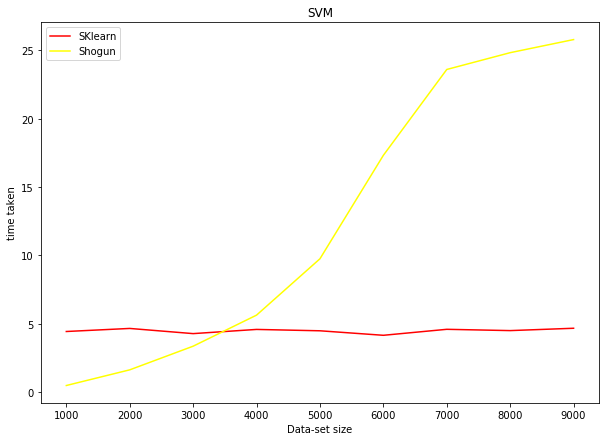

In [85]:
# PLOTTING
plt.figure(figsize=(10,7))
plt.title('SVM')
plt.plot(size,time_skl,color='red',label='SKlearn')
plt.plot(size,time_sgn,color='yellow',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('time taken')
plt.legend()

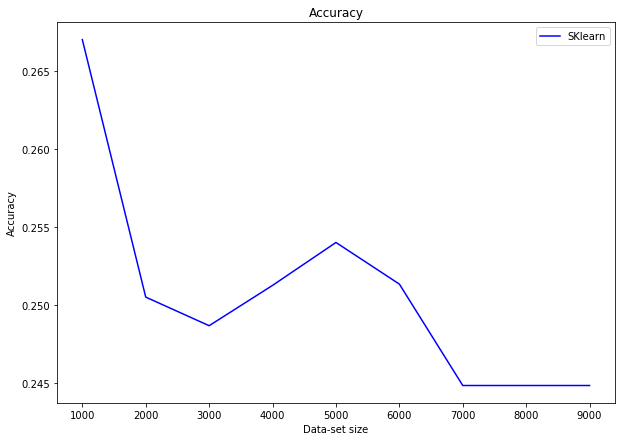

In [86]:
# PLOTTING
plt.figure(figsize=(10,7))
plt.title('Accuracy')
plt.plot(size,accuracy_list,color='blue',label='SKlearn')
plt.xlabel('Data-set size')
plt.ylabel('Accuracy')
plt.legend()